# Projet TINDER




## Idées d'exploration de données :

Quels sont les attributs les moins souhaitables chez un partenaire masculin ? Est-ce différent pour les partenaires féminins ?

Dans quelle mesure les gens pensent-ils que l'attractivité est importante dans la sélection potentielle des partenaires par rapport à son impact réel ?

Les intérêts communs sont-ils plus importants qu'un arrière-plan racial partagé ?

Les gens peuvent-ils prédire avec précision leur propre valeur perçue sur le marché des rencontres ?

En ce qui concerne l'obtention d'un deuxième rendez-vous, est-il préférable d'être le premier rendez-vous de vitesse de quelqu'un de la nuit ou son dernier ?

In [3]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as py




In [4]:
# Import des données
dataset = pd.read_csv("Speed+Dating+Data.csv", encoding="ISO-8859-1")
display(dataset.head())

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# Affichage des colonnes

dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [114]:
# Affichage des informations sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 196 entries, iid to total_matches
dtypes: float64(175), int64(14), object(7)
memory usage: 12.5+ MB


In [115]:
# Affichage des statistiques descriptives


dataset.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,total_matches
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,8378.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611,2.722487
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988,2.387189
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,1.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,2.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,4.000000


In [152]:
# Nombre de participant par sexe
repartition = dataset.groupby('iid')['gender'].first().apply(lambda x: 'Homme' if x==1 else 'Femme' if x==0 else 'NaN').value_counts()
print('Nombre de participants par sexe:', repartition)

total = repartition.sum()
print(total)


Nombre de participants par sexe: gender
Homme    277
Femme    274
Name: count, dtype: int64
551


In [10]:
dataset.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [89]:
# compte le nombre de match
match = dataset['match'].apply(lambda x: 'Yes' if x == 1 else 'No').value_counts()
print(match)




match
No     6998
Yes    1380
Name: count, dtype: int64


In [11]:
#REMPLACEMENT DES VALEURS MANQUANTES
#colonnes gender

gender = dataset["gender"].apply(lambda x: 'Homme' if x==0 else 'Femme' if x==1 else 'NaN')
gender= gender.value_counts()
print(gender)



gender
Femme    4194
Homme    4184
Name: count, dtype: int64


In [12]:
#remplace_libellé

Sexe = dataset['gender'].replace([0,1],['Homme','Femme'])
print(Sexe.value_counts())

gender
Femme    4194
Homme    4184
Name: count, dtype: int64


In [98]:
# selon le sexe

match_sex = if x == 1 else 'Homme'.value_counts()
            else 'Femme' if x == 0 else 'NaN'.value_counts()

print(match_sex)

SyntaxError: invalid syntax (2457745964.py, line 3)

## Quels sont les attributs les moins souhaitables chez un partenaire masculin ? Est-ce différent pour les partenaires féminins ?

In [13]:
# Calcul des moyennes des notes attribuées par les participants sur les attributs des partenaires

attribut = ['gender','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

moyenne_attribut = dataset[attribut].groupby('gender').mean()
moyenne_attribut = moyenne_attribut.rename(index={0:'Femme', 1:'Homme'})

print(moyenne_attribut)


          attr1_1    sinc1_1   intel1_1     fun1_1     amb1_1    shar1_1
gender                                                                  
Femme   18.055224  18.305008  21.002502  17.147292  12.827222  12.704194
Homme   26.921689  16.498436  19.537374  17.763893   8.552829  10.996574


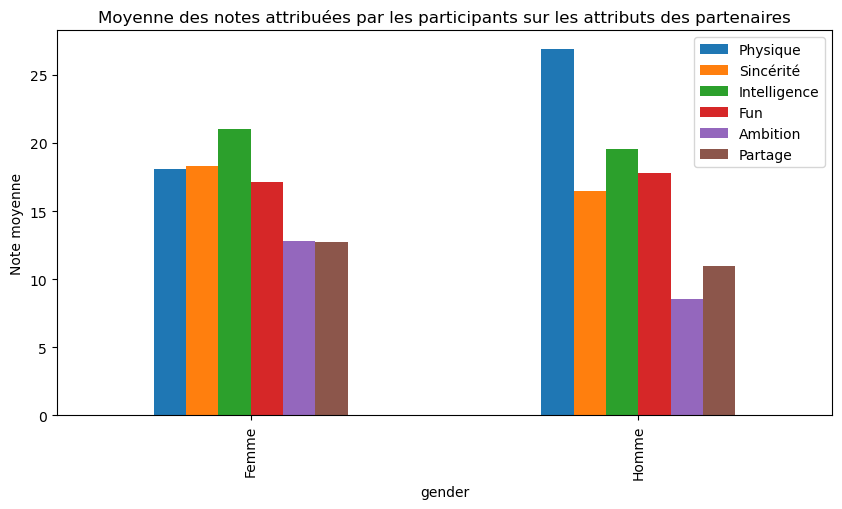

In [14]:
#Representation graphique des résultats
plt.figure(figsize=(10, 5))
plt.title('Moyenne des notes attribuées par les participants sur les attributs des partenaires')
plt.xlabel('Attribut')
plt.ylabel('Note moyenne')
plt.grid(True)
plt.xticks(rotation=45)

remplace_libellé = {'attr1_1': 'Physique', 'sinc1_1': 'Sincérité', 'intel1_1': 'Intelligence', 'fun1_1': 'Fun', 'amb1_1': 'Ambition', 'shar1_1': 'Partage'}
moyenne_attribut.rename(columns=remplace_libellé, inplace=True)

moyenne_attribut.plot(kind='bar', ax=plt.gca())
plt.show()

#Represntation graphique des résultats avec plotly express pour une meilleure visualisation par genre

# par femme
fig = go.Figure()
fig.add_trace(go.Bar(x=moyenne_attribut.columns, y=moyenne_attribut.loc['Femme'], name='Femme', marker_color='indianred')) 
fig.update_layout(title='Moyenne des notes attribuées par les femmes sur les attributs des partenaires', xaxis_title='Attribut', yaxis_title='Note moyenne')
fig.show()

#par homme
fig = go.Figure()
fig.add_trace(go.Bar(x=moyenne_attribut.columns, y=moyenne_attribut.loc['Homme'], name='Homme', marker_color='indianred')) 
fig.update_layout(title='Moyenne des notes attribuées par les Hommes sur les attributs des partenaires', xaxis_title='Attribut', yaxis_title='Note moyenne')
fig.show()

#Calcul des moyennes des notes attribuées par les participants y=moyenne_attribut.loc[0:1], name=['Femme':'Homme']
fig=px.bar(moyenne_attribut.T, barmode='group', title='Moyenne des notes attribuées par les participants sur les attributs des partenaires par genre')
fig.update_layout(xaxis_title='Attribut', yaxis_title='Note moyenne')
fig.show()



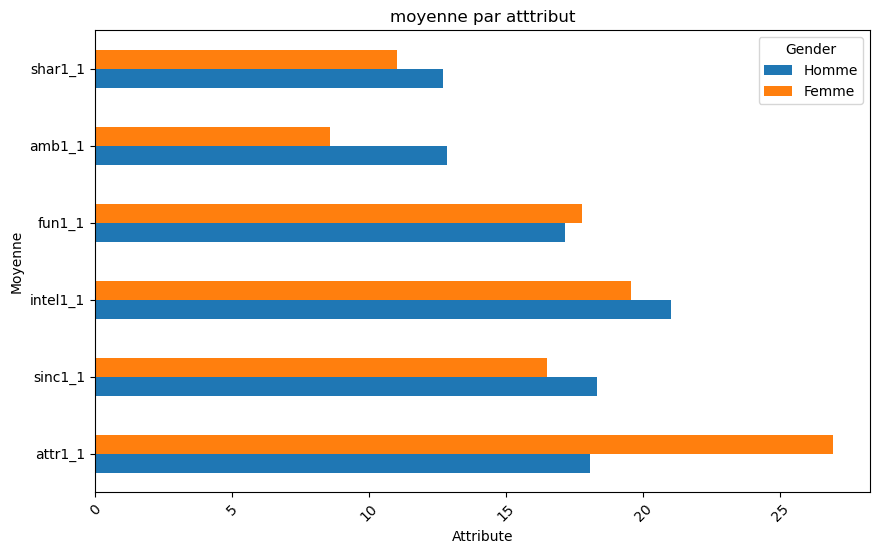

In [118]:
# Select the attributes to compare

attributes = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Filter the dataset for men and women separately
men_data = dataset[dataset['gender'] == 0]
women_data = dataset[dataset['gender'] == 1]

# Calculate the average ratings for each attribute for men and women
men_avg_ratings = men_data[attributes].mean()
women_avg_ratings = women_data[attributes].mean()

# Create a dataframe to store the average ratings
avg_ratings_df = pd.DataFrame({'Homme': men_avg_ratings, 'Femme': women_avg_ratings})

# Plot the grouped bar chart
avg_ratings_df.plot(kind='barh', figsize=(10, 6))
plt.title('moyenne par atttribut')
plt.xlabel('Attribute')
plt.ylabel('Moyenne')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


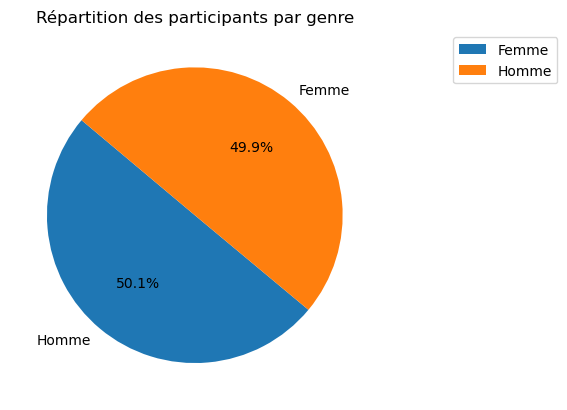

In [16]:

# Representation graphique des résultats
plt.pie(dataset['gender'].value_counts(), labels=['Homme', 'Femme'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des participants par genre')
plt.legend(gender.index, loc='upper right', bbox_to_anchor=(1.5, 1))


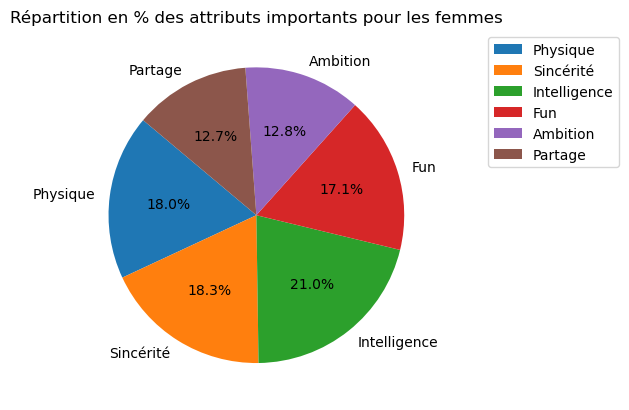

In [18]:
plt.pie(moyenne_attribut.loc['Femme'], labels=moyenne_attribut.columns, autopct='%1.1f%%', startangle=140)
plt.title('Répartition en % des attributs importants pour les femmes')
plt.legend(moyenne_attribut.columns, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()



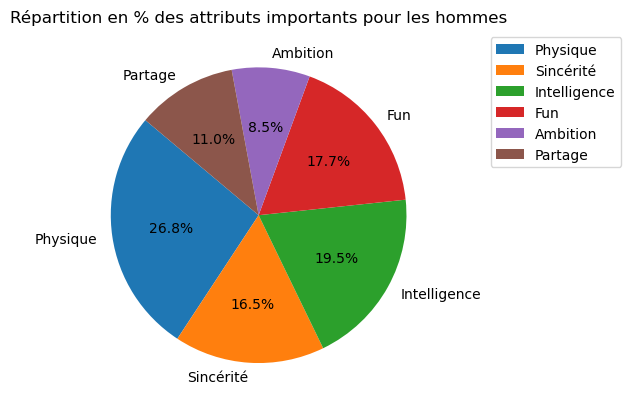

In [19]:
plt.pie(moyenne_attribut.loc['Homme'], labels=moyenne_attribut.columns, autopct='%1.1f%%', startangle=140)
plt.title('Répartition en % des attributs importants pour les hommes')
plt.legend(moyenne_attribut.columns, loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


## Importance de l'attractivité physique pour les hommes et les femmes


In [20]:
# Calcul de la correlation sur l'attractivité physique et l'attractivité générale
correlation= dataset[['attr1_1', 'match','gender', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].corr()
print(correlation)

           attr1_1     match    gender   sinc1_1  intel1_1    fun1_1  \
attr1_1   1.000000  0.014950  0.352203 -0.439123 -0.350179 -0.183914   
match     0.014950  1.000000 -0.000530 -0.032325  0.014087  0.041652   
gender    0.352203 -0.000530  1.000000 -0.128191 -0.108005  0.050666   
sinc1_1  -0.439123 -0.032325 -0.128191  1.000000 -0.112914 -0.161055   
intel1_1 -0.350179  0.014087 -0.108005 -0.112914  1.000000 -0.141872   
fun1_1   -0.183914  0.041652  0.050666 -0.161055 -0.141872  1.000000   
amb1_1   -0.476061 -0.004444 -0.348955  0.005322 -0.040045 -0.070189   
shar1_1  -0.453295 -0.048318 -0.134207  0.037065 -0.081152 -0.196154   

            amb1_1   shar1_1  
attr1_1  -0.476061 -0.453295  
match    -0.004444 -0.048318  
gender   -0.348955 -0.134207  
sinc1_1   0.005322  0.037065  
intel1_1 -0.040045 -0.081152  
fun1_1   -0.070189 -0.196154  
amb1_1    1.000000  0.145994  
shar1_1   0.145994  1.000000  


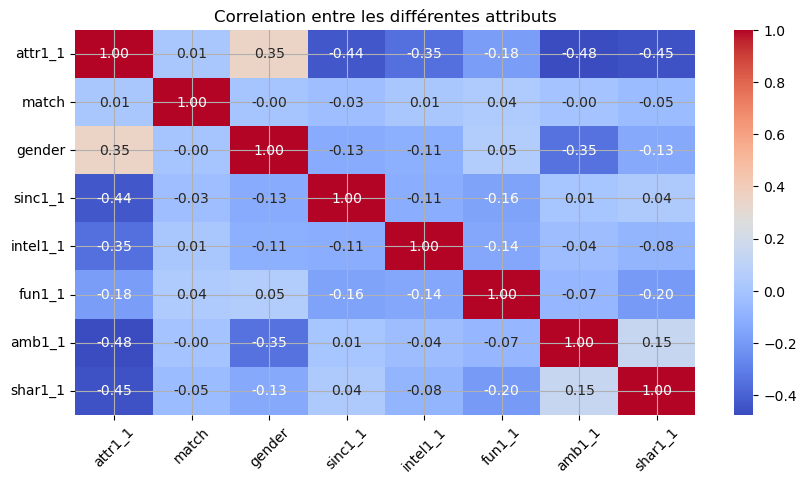

In [21]:
#Representation graphique de la correlation

plt.figure(figsize=(10, 5))
plt.title('Correlation entre les différentes attributs')
plt.xlabel('Attribut')
plt.ylabel('Note moyenne')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [22]:
#Representation graphique de la correlation avec plotly express
fig = px.imshow(correlation, title='Correlation entre les différentes attributs')
fig.show()

## Correlation entre physique, race et autres attributs



In [24]:
correlation_interet= dataset[['shar1_1', 'samerace', 'match']].corr()
print(correlation_interet)

           shar1_1  samerace     match
shar1_1   1.000000 -0.015006 -0.048318
samerace -0.015006  1.000000  0.013028
match    -0.048318  0.013028  1.000000


In [27]:
correlation_Bis = dataset[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','gender','match','samerace']].corr()
print(correlation_Bis)

           attr1_1   sinc1_1  intel1_1    fun1_1    amb1_1   shar1_1  \
attr1_1   1.000000 -0.439123 -0.350179 -0.183914 -0.476061 -0.453295   
sinc1_1  -0.439123  1.000000 -0.112914 -0.161055  0.005322  0.037065   
intel1_1 -0.350179 -0.112914  1.000000 -0.141872 -0.040045 -0.081152   
fun1_1   -0.183914 -0.161055 -0.141872  1.000000 -0.070189 -0.196154   
amb1_1   -0.476061  0.005322 -0.040045 -0.070189  1.000000  0.145994   
shar1_1  -0.453295  0.037065 -0.081152 -0.196154  0.145994  1.000000   
gender    0.352203 -0.128191 -0.108005  0.050666 -0.348955 -0.134207   
match     0.014950 -0.032325  0.014087  0.041652 -0.004444 -0.048318   
samerace  0.019751 -0.050950  0.023244  0.033560 -0.027262 -0.015006   

            gender     match  samerace  
attr1_1   0.352203  0.014950  0.019751  
sinc1_1  -0.128191 -0.032325 -0.050950  
intel1_1 -0.108005  0.014087  0.023244  
fun1_1    0.050666  0.041652  0.033560  
amb1_1   -0.348955 -0.004444 -0.027262  
shar1_1  -0.134207 -0.048318 -0.0

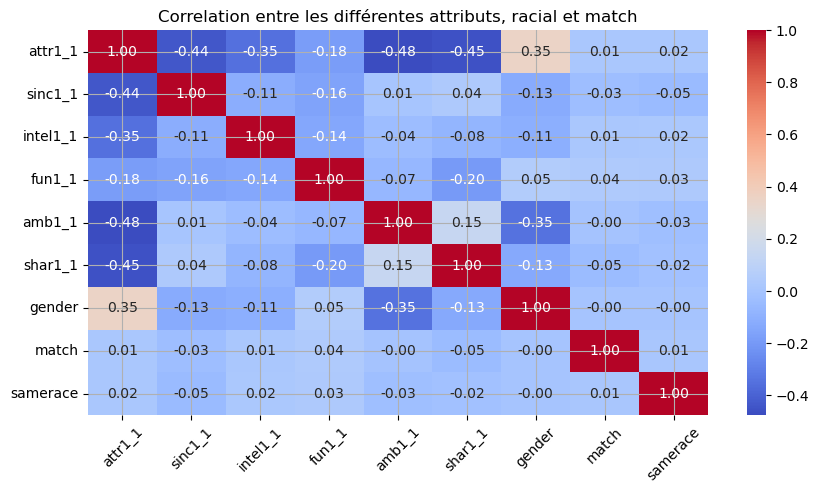

In [28]:
#Representation graphique de la correlation

plt.figure(figsize=(10, 5))
plt.title('Correlation entre les différentes attributs, racial et match')
plt.xlabel('Attribut')
plt.ylabel('correlation')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(correlation_Bis, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [69]:
# SCATTER PLOT SUR LA CORRELATION ENTRE ATTRIBUTS ET MATCH

fig = px.scatter(correlation_Bis, title='Correlation entre les différentes attributs, racial et match')
fig.show()




In [41]:
# Ajout d'une colonne pour compter le nombre de matches par participant
dataset['total_matches'] = dataset.groupby('iid')['match'].transform('sum')
self_assessment_cols = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'total_matches']
self_assessment = dataset[['iid'] + self_assessment_cols].drop_duplicates()
correlation_self_assessment_matches = self_assessment.corr()
print(correlation_self_assessment_matches['total_matches'])

iid              0.008557
attr3_1          0.084855
sinc3_1          0.002094
intel3_1         0.029072
fun3_1           0.130457
amb3_1           0.026714
total_matches    1.000000
Name: total_matches, dtype: float64


/Users/nicolasherve/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nicolasherve/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nicolasherve/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nicolasherve/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/nicolasherve/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

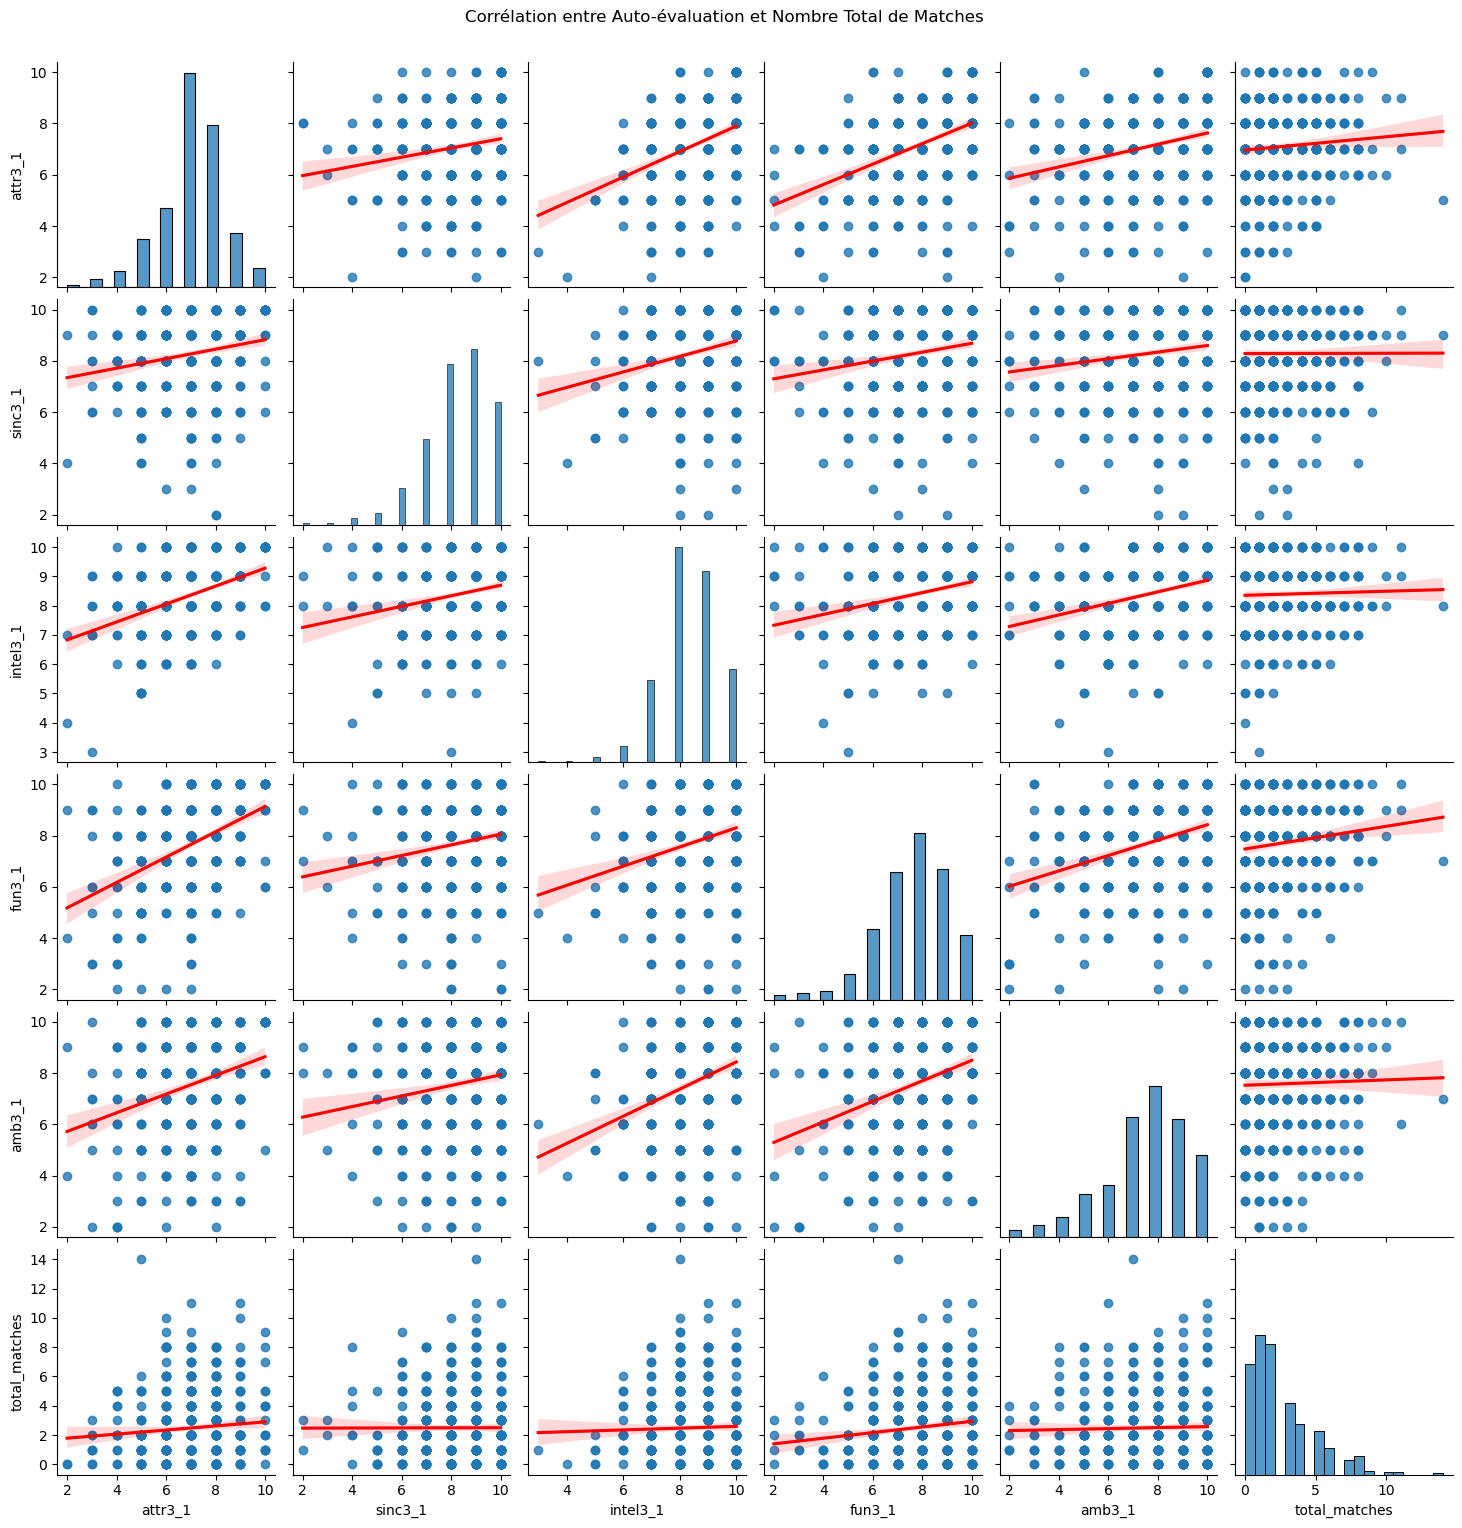

In [42]:
sns.pairplot(self_assessment.drop(columns=['iid']), kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Corrélation entre Auto-évaluation et Nombre Total de Matches', y=1.02)
plt.show()

## VISUALISATION DE LA CORRELATION ENTRE second date et physique



In [106]:
# Calcul de la correlation

correlation_secondate= dataset[['attr_o', 'dec_o','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1','gender','match','samerace']].corr()
print(correlation_secondate)

            attr_o     dec_o   attr1_1   sinc1_1  intel1_1    fun1_1  \
attr_o    1.000000  0.486885  0.051846 -0.100843 -0.006770  0.065657   
dec_o     0.486885  1.000000  0.036490 -0.069061  0.004128  0.041704   
attr1_1   0.051846  0.036490  1.000000 -0.439123 -0.350179 -0.183914   
sinc1_1  -0.100843 -0.069061 -0.439123  1.000000 -0.112914 -0.161055   
intel1_1 -0.006770  0.004128 -0.350179 -0.112914  1.000000 -0.141872   
fun1_1    0.065657  0.041704 -0.183914 -0.161055 -0.141872  1.000000   
amb1_1    0.058931  0.036711 -0.476061  0.005322 -0.040045 -0.070189   
shar1_1  -0.107126 -0.079075 -0.453295  0.037065 -0.081152 -0.196154   
gender   -0.138956 -0.111550  0.352203 -0.128191 -0.108005  0.050666   
match     0.260837  0.522326  0.014950 -0.032325  0.014087  0.041652   
samerace  0.048020  0.023626  0.019751 -0.050950  0.023244  0.033560   

            amb1_1   shar1_1    gender     match  samerace  
attr_o    0.058931 -0.107126 -0.138956  0.260837  0.048020  
dec_o     0.0

<Axes: title={'center': "Correlation entre le second rendez-vous et l'attractivité physique"}>

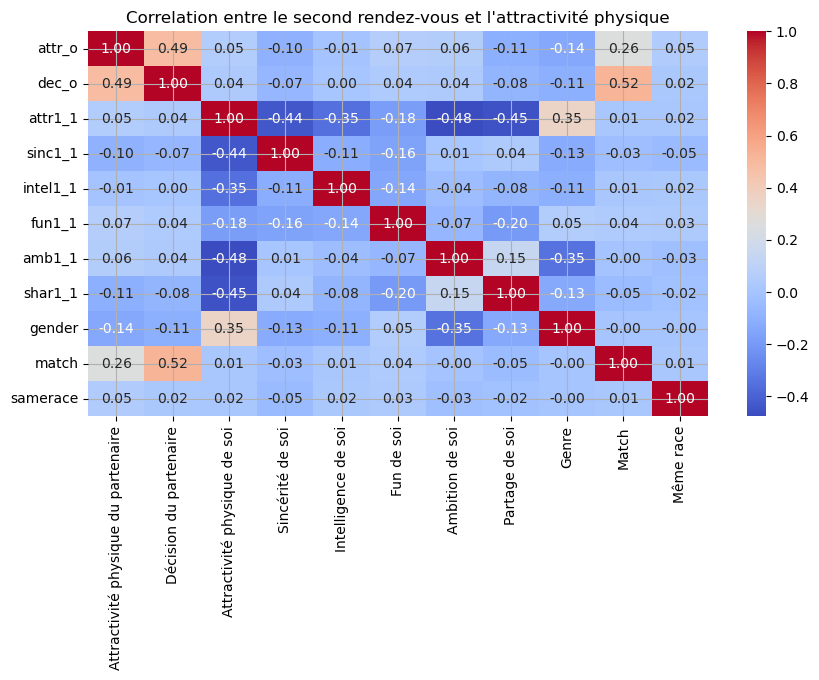

In [107]:
plt.figure(figsize=(10, 5))
plt.title('Correlation entre le second rendez-vous et l\'attractivité physique')
plt.xlabel('Attribut')
plt.ylabel('Correlation')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

attribute_names = {
    'attr_o': 'Attractivité physique du partenaire',
    'dec_o': 'Décision du partenaire',
    'attr1_1': 'Attractivité physique de soi',
    'sinc1_1': 'Sincérité de soi',
    'intel1_1': 'Intelligence de soi',
    'fun1_1': 'Fun de soi',
    'amb1_1': 'Ambition de soi',
    'shar1_1': 'Partage de soi',
    'gender': 'Genre',
    'match': 'Match',
    'samerace': 'Même race'
}

correlation_secondate.rename(columns=attribute_names, inplace=True)
sns.heatmap(correlation_secondate, annot=True, cmap='coolwarm', fmt=".2f")

In [111]:
# correlation entre le but les impression religieuse et raciale
#dataset['tuition'] = dataset['tuition'].str.replace(',', '').astype(float)
but = dataset[['goal', 'gender', 'match', 'samerace', 'tuition', 'imprelig', 'imprace']].corr()
print(but)

              goal    gender     match  samerace   tuition  imprelig   imprace
goal      1.000000  0.025949 -0.010306  0.017048 -0.018789 -0.019664 -0.072949
gender    0.025949  1.000000 -0.000530 -0.000966  0.051352 -0.199148 -0.113211
match    -0.010306 -0.000530  1.000000  0.013028  0.041439 -0.026014 -0.049032
samerace  0.017048 -0.000966  0.013028  1.000000  0.072129  0.071044  0.090517
tuition  -0.018789  0.051352  0.041439  0.072129  1.000000  0.131539  0.033102
imprelig -0.019664 -0.199148 -0.026014  0.071044  0.131539  1.000000  0.430284
imprace  -0.072949 -0.113211 -0.049032  0.090517  0.033102  0.430284  1.000000


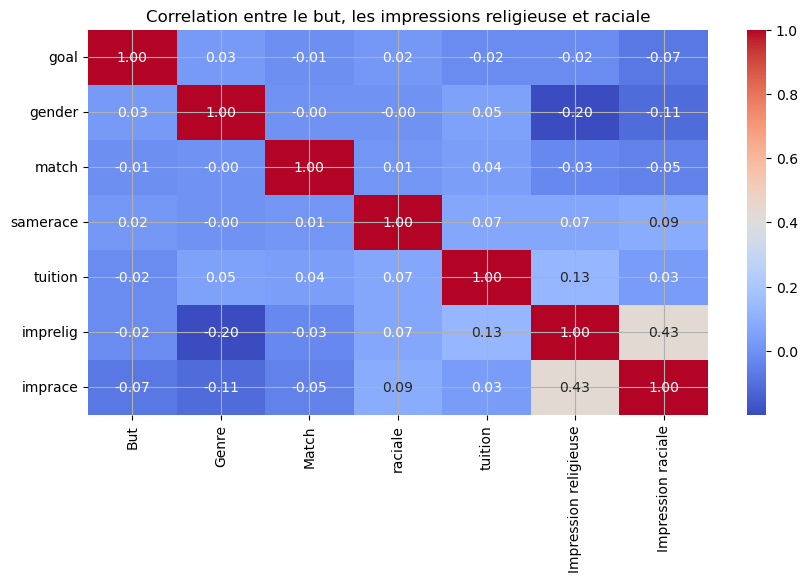

In [113]:
# Representation graphique de la correlation
plt.figure(figsize=(10, 5))
plt.title('Correlation entre le but, les impressions religieuse et raciale')
plt.xlabel('Attribut')
plt.ylabel('Correlation')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

attribute_names = {
    'goal': 'But',
    'gender': 'Genre',
    'match': 'Match',
    'samerace': 'raciale',
    'tuition': 'tuition',
    'imprelig': 'Impression religieuse',
    'imprace': 'Impression raciale'
}

but.rename(columns=attribute_names, inplace=True)
sns.heatmap(but, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [112]:
#Representation graphique de la correlation avec plotly express
fig = px.imshow(but, title='Correlation entre l objectif et le match, racial et tuition')
fig.show()

## relation gender et sortie

In [67]:
# moyenne entre sortie et sexe

moy_SORTIE = ['gender','date','go_out','match']
moyenne_SORTIE = dataset[moy_SORTIE].groupby('gender').mean()
moyenne_SORTIE = moyenne_SORTIE.rename(index={0:'Femme', 1:'Homme'})
print(moyenne_SORTIE)

            date    go_out     match
gender                              
Femme   5.153212  2.139394  0.164914
Homme   4.861405  2.176569  0.164521


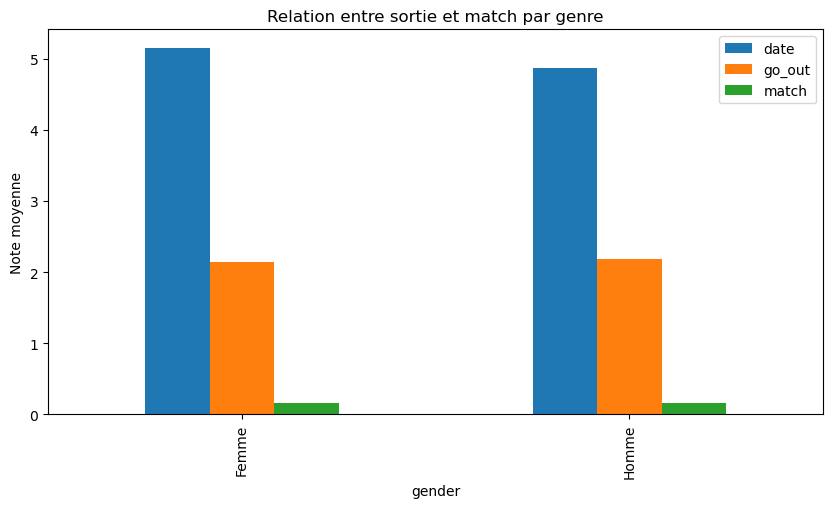

In [68]:
#Representation graphique des résultats
plt.figure(figsize=(10, 5))
plt.title('Relation entre sortie et match par genre')
plt.xlabel('Attribut')
plt.ylabel('Note moyenne')
plt.grid(True)
plt.xticks(rotation=45)
moyenne_SORTIE.plot(kind='bar', ax=plt.gca())
plt.show()


               date    go_out     match    gender
age_group                                        
18-24      5.014790  2.038383  0.167861  0.525253
25-29      4.962519  2.037328  0.178595  0.532960
30-34      4.917015  2.502557  0.128880  0.521305
35-39      5.655556  2.428889  0.094386  0.488889
40-44      7.000000  3.000000  0.200000  1.000000
45-49           NaN       NaN       NaN       NaN
50-54           NaN       NaN       NaN       NaN
55-60      7.000000  3.000000  0.000000  0.000000


/var/folders/h5/tjbnq0312nnbccsycqjy_ftc0000gn/T/ipykernel_989/1117612452.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



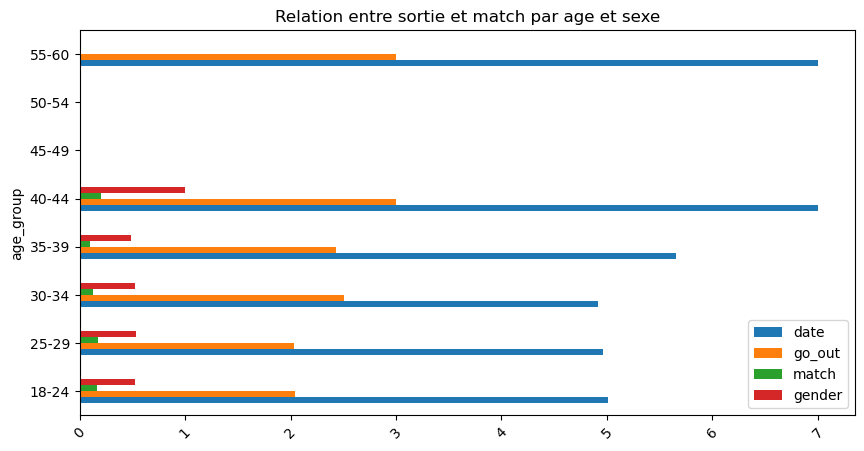

In [131]:
#refaire le découpage par Age

# moyenne entre sortie et age

moy_SORTIE = ['age','date','go_out','match','gender']
moyenne_SORTIE = dataset[moy_SORTIE].groupby('age').mean()

# Faire un découpage par tranche d'âge

bins = [18, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-60']
moyenne_SORTIE['age_group'] = pd.cut(moyenne_SORTIE.index, bins, labels=labels, right=False)
moyenne_SORTIE = moyenne_SORTIE.groupby('age_group').mean()


print(moyenne_SORTIE)

#Representation graphique des résultats
plt.figure(figsize=(10, 5))
plt.title('Relation entre sortie et match par age et sexe')
plt.xlabel('Attribut')
plt.ylabel('Note moyenne')
plt.grid(True)
plt.xticks(rotation=45)
moyenne_SORTIE.plot(kind='barh', ax=plt.gca())
plt.show()

#Representation graphique des résultats avec plotly express pour une meilleure visualisation par genre

fig = go.Figure()
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['18-24'], name='18-24', marker_color='red'))
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['25-29'], name='25-29', marker_color='salmon'))
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['30-34'], name='30-34', marker_color='seagreen'))
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['35-39'], name='35-39', marker_color='blue'))
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['40-44'], name='40-44', marker_color='green'))
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['45-49'], name='45-49', marker_color='coral'))
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['50-54'], name='50-54', marker_color='lightblue'))
fig.add_trace(go.Bar(x=moyenne_SORTIE.columns, y=moyenne_SORTIE.loc['55-60'], name='55-60', marker_color='pink'))
fig.update_layout(title='Relation entre sortie et match par age et sexe', xaxis_title='Attribut', yaxis_title='Note moyenne')
fig.show()

In [159]:
# repartition par age et sexe du panel de présentation

repartition_age = dataset.groupby(['iid', 'gender'])['age'].first()
repartition_age = repartition_age.reset_index()
repartition_age = pd.cut(repartition_age['age'], bins=bins, labels=labels, right=False).value_counts()

print(repartition_age)

age
25-29    265
18-24    186
30-34     79
35-39     11
40-44      1
55-60      1
45-49      0
50-54      0
Name: count, dtype: int64


Ils sortent une fois par mois sur les sites de rencontre sachant qu'il sortent moyenne 2 fois par semaine
Y a t il une fin dans les matchs sur l'application doivent ils se rencontrer en vrai


In [79]:
fig = px.scatter(dataset, x = "match", y = "goal", color = "gender", trendline = "ols", marginal_x = "violin", marginal_y = "box")
fig.show()

#Calcul de la correlation entre l'objectif et le match
correlation_objectif= dataset[['goal','']].corr()
print(correlation_objectif)

           goal     match
goal   1.000000 -0.010306
match -0.010306  1.000000


In [122]:
# utilisation de l'int correlation sur la premiere date et le match

Interet_correlation=['int_corr','match','gender','age','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']
Interet_correlation= dataset[Interet_correlation].groupby('gender').mean()
Interet_correlation = Interet_correlation.rename(index={0:'Femme', 1:'Homme'})
print(Interet_correlation)

        int_corr     match        age    attr1_1    sinc1_1   intel1_1  \
gender                                                                   
Femme   0.196300  0.164914  26.105851  18.055224  18.305008  21.002502   
Homme   0.195721  0.164521  26.609270  26.921689  16.498436  19.537374   

           fun1_1     amb1_1    shar1_1  
gender                                   
Femme   17.147292  12.827222  12.704194  
Homme   17.763893   8.552829  10.996574  


In [161]:
# Calcul de la corrélation entre l'ordre de rencontre et le succès des matches
order_match_data = dataset[['order', 'match']].copy()
correlation_order_match = order_match_data.corr()
print(correlation_order_match)

          order     match
order  1.000000 -0.038731
match -0.038731  1.000000


## calcul de la moyenne des notes sur l'integralite des attributs


In [5]:
# moyenne des notes :

moyenne_note = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1','attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met','gender','age','date','go_out','imprelig','imprace','samerace','age_o']
moyenne_note = dataset[moyenne_note].groupby('gender').mean()
moyenne_note = moyenne_note.rename(index={0:'Femme', 1:'Homme'})
print(moyenne_note)


          attr1_1    sinc1_1   intel1_1     fun1_1     amb1_1    shar1_1  \
gender                                                                     
Femme   18.055224  18.305008  21.002502  17.147292  12.827222  12.704194   
Homme   26.921689  16.498436  19.537374  17.763893   8.552829  10.996574   

          attr_o    sinc_o   intel_o     fun_o  ...      like      prob  \
gender                                          ...                       
Femme   6.461401  7.251053  7.291202  6.520164  ...  5.991850  5.215672   
Homme   5.919422  7.099778  7.447362  6.280555  ...  6.274933  5.199432   

             met        age      date    go_out  imprelig   imprace  samerace  \
gender                                                                          
Femme   0.951738  26.105851  5.153212  2.139394  4.213576  4.108848  0.396272   
Homme   0.945804  26.609270  4.861405  2.176569  3.096310  3.464542  0.395327   

            age_o  
gender             
Femme   26.621901  
Homme   2

In [6]:
#Mediane des notes
mediane_note = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1','attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met','gender','age','date','go_out','imprelig','imprace','samerace','age_o']
mediane_note = dataset[mediane_note].groupby('gender').median()
mediane_note = mediane_note.rename(index={0:'Femme', 1:'Homme'})
print(mediane_note)

        attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr_o  sinc_o  \
gender                                                                        
Femme    15.380    20.00      20.0   17.78    15.0    13.21     7.0     7.0   
Homme    23.905    17.39      20.0   18.75    10.0    10.00     6.0     7.0   

        intel_o  fun_o  ...  like  prob  met   age  date  go_out  imprelig  \
gender                  ...                                                  
Femme       7.0    7.0  ...   6.0   5.0  0.0  26.0   5.0     2.0       4.0   
Homme       8.0    6.0  ...   6.0   5.0  0.0  27.0   5.0     2.0       2.0   

        imprace  samerace  age_o  
gender                            
Femme       3.0       0.0   27.0  
Homme       3.0       0.0   26.0  

[2 rows x 33 columns]


In [8]:
#Ecart type des notes
ecart_type_note = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1','attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met','gender','age','date','go_out','imprelig','imprace','samerace','age_o']
ecart_type_note = dataset[ecart_type_note].groupby('gender').std()
ecart_type_note = ecart_type_note.rename(index={0:'Femme', 1:'Homme'})
print(ecart_type_note)

          attr1_1   sinc1_1  intel1_1    fun1_1    amb1_1   shar1_1    attr_o  \
gender                                                                          
Femme    9.496919  6.755334  6.778147  5.532110  5.481803  5.796059  1.858313   
Homme   13.669663  7.212455  6.709546  6.573848  5.985803  6.770200  2.002019   

          sinc_o   intel_o     fun_o  ...      like      prob       met  \
gender                                ...                                 
Femme   1.612199  1.484830  1.837989  ...  1.909141  2.143114  0.997958   
Homme   1.856756  1.609873  2.057324  ...  1.760477  2.116261  0.981879   

             age      date    go_out  imprelig   imprace  samerace     age_o  
gender                                                                        
Femme   3.683108  1.446858  1.055314  2.922572  3.015404  0.489181  3.422257  
Homme   3.429930  1.427609  1.152298  2.566409  2.628817  0.488979  3.683108  

[2 rows x 33 columns]


In [17]:
#representation graphique des résultats

# Note moyenne
fig = go.Figure()
fig.add_trace(go.Bar(x=moyenne_note.columns, y=moyenne_note.loc['Femme'], name='Femme', marker_color='red'))  
fig.add_trace(go.Bar(x=moyenne_note.columns, y=moyenne_note.loc['Homme'], name='Homme', marker_color='blue'))
fig.update_layout(title='Moyenne des notes attribuées par les participants sur les attributs des partenaires par genre', xaxis_title='Attribut', yaxis_title='Note moyenne')
fig.show()

# Note mediane
fig = go.Figure()
fig.add_trace(go.Bar(x=mediane_note.columns, y=moyenne_note.loc['Femme'], name='Femme', marker_color='red'))  
fig.add_trace(go.Bar(x=mediane_note.columns, y=moyenne_note.loc['Homme'], name='Homme', marker_color='blue'))
fig.update_layout(title='Mediane des notes attribuées par les participants sur les attributs des partenaires par genre', xaxis_title='Attribut', yaxis_title='Note moyenne')
fig.show()

# Ecart type
fig = go.Figure()
fig.add_trace(go.Bar(x=ecart_type_note.columns, y=moyenne_note.loc['Femme'], name='Femme', marker_color='red'))  
fig.add_trace(go.Bar(x=ecart_type_note.columns, y=moyenne_note.loc['Homme'], name='Homme', marker_color='blue'))
fig.update_layout(title='Mediane des notes attribuées par les participants sur les attributs des partenaires par genre', xaxis_title='Attribut', yaxis_title='Note moyenne')
fig.show()

In [12]:
correlation_notes = dataset[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1','attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met','gender','age','date','go_out','imprelig','imprace','samerace','age_o']].corr()
print(correlation_notes)

           attr1_1   sinc1_1  intel1_1    fun1_1    amb1_1   shar1_1  \
attr1_1   1.000000 -0.439123 -0.350179 -0.183914 -0.476061 -0.453295   
sinc1_1  -0.439123  1.000000 -0.112914 -0.161055  0.005322  0.037065   
intel1_1 -0.350179 -0.112914  1.000000 -0.141872 -0.040045 -0.081152   
fun1_1   -0.183914 -0.161055 -0.141872  1.000000 -0.070189 -0.196154   
amb1_1   -0.476061  0.005322 -0.040045 -0.070189  1.000000  0.145994   
shar1_1  -0.453295  0.037065 -0.081152 -0.196154  0.145994  1.000000   
attr_o    0.051846 -0.100843 -0.006770  0.065657  0.058931 -0.107126   
sinc_o   -0.023338  0.022633 -0.038159  0.012303  0.040130  0.018900   
intel_o  -0.003456 -0.009441 -0.002160 -0.003304 -0.005650  0.021427   
fun_o     0.025474 -0.070435 -0.012126  0.071868  0.045889 -0.080013   
amb_o     0.064979 -0.064342 -0.035439  0.012166 -0.020345 -0.016276   
shar_o    0.006302 -0.050325 -0.011675  0.043350  0.037565 -0.033850   
attr3_1   0.179224 -0.198626 -0.060056 -0.010707  0.082594 -0.13

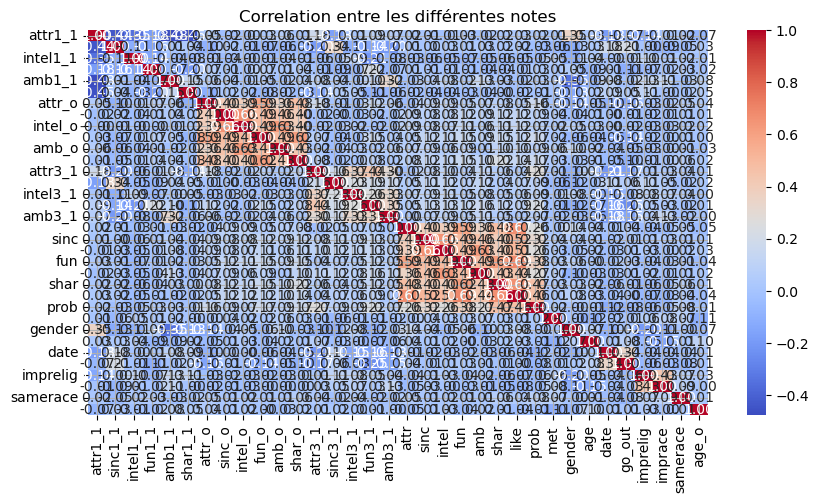

In [13]:
# Representation graphique de la correlation

plt.figure(figsize=(10, 5))
plt.title('Correlation entre les différentes notes')
plt.xlabel('Attribut')
plt.ylabel('Correlation')
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(correlation_notes, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [14]:
#Representation graphique de la correlation avec plotly express
fig = px.imshow(correlation_notes, title='Correlation entre les différentes notes')
fig.show()
